In [1]:
import pandas as pd
train=pd.read_csv(r'D:\data_kaggle\train.csv')
test=pd.read_csv(r'D:\data_kaggle\test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#data visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #for default

In [13]:
def bar_chart(features):
    survived = train[train['Survived']==1][features].value_counts()
    de=train[train['Survived']==0][features].value_counts()
    df=pd.DataFrame([survived,de])
    df.index=['Survived','Not']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

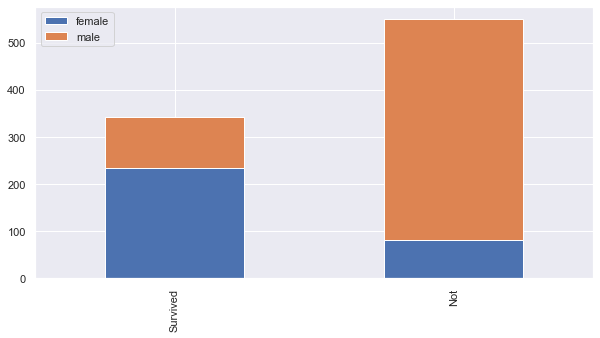

In [14]:
bar_chart('Sex')

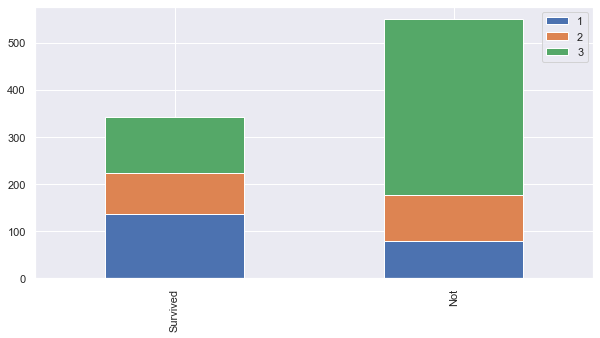

In [15]:
bar_chart('Pclass')

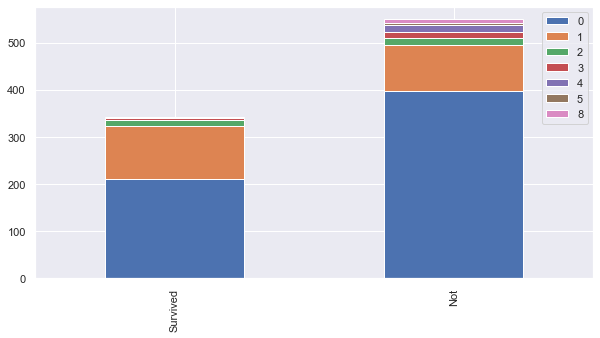

In [16]:
bar_chart('SibSp')

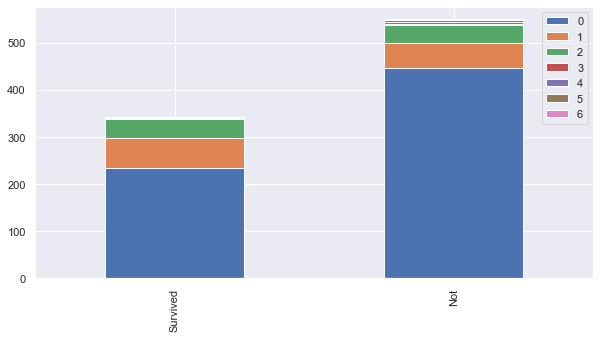

In [17]:
bar_chart('Parch')

In [18]:
#feature Engineering

In [19]:
train.head(0) #features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
#dropping names from dataset
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:

train_test_data=[train,test] #combining train and test dataset

In [24]:
sex_mapping={'male':0,'female':1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

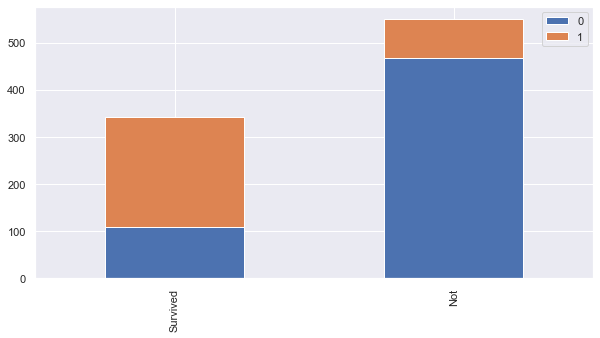

In [25]:
bar_chart('Sex')

In [26]:
#AGE

In [27]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S


In [28]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
train['Age'].mean()

29.69911764705882

In [30]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S


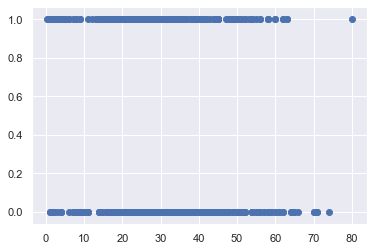

In [34]:
plt.scatter(train.Age,train.Survived)

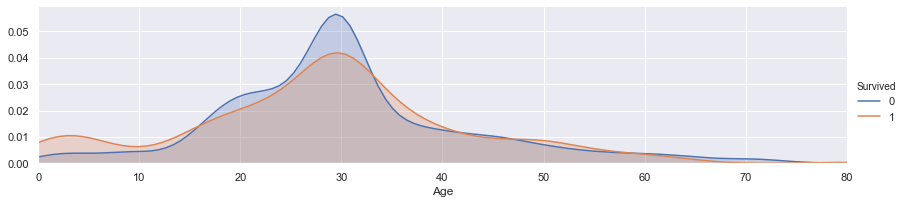

In [35]:
facet= sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

(0, 20)

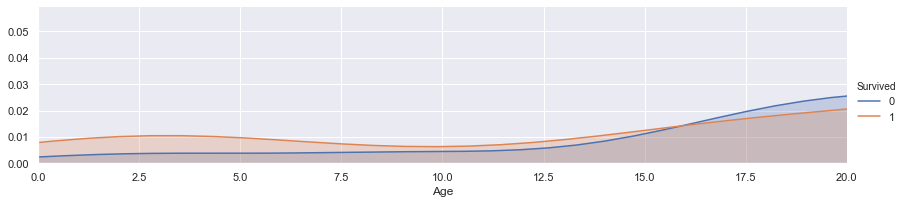

In [36]:
facet= sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 40)

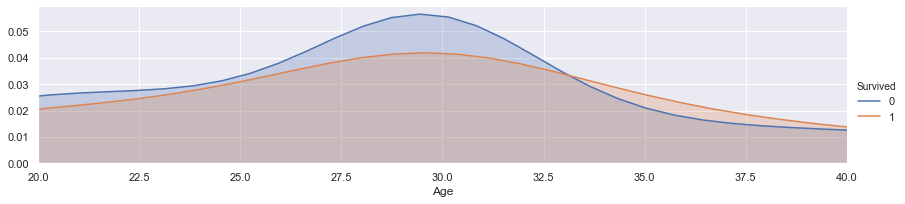

In [37]:
facet= sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

In [38]:
#Binning
#Converting Numerical age to categorial variable

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [40]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S


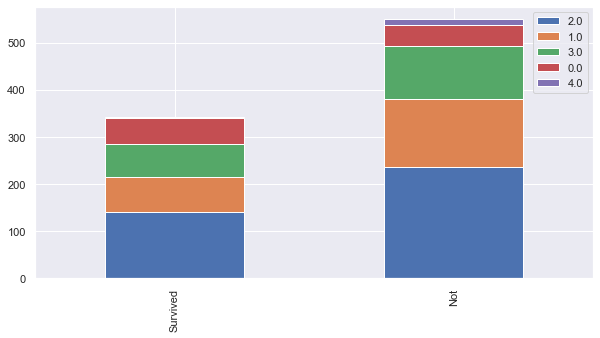

In [41]:

bar_chart('Age')

In [42]:
#embarked

In [43]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

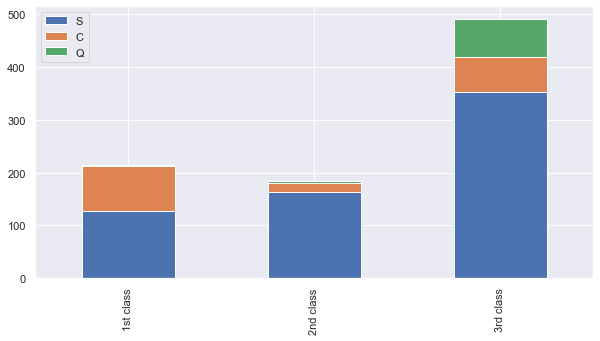

In [45]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [46]:
#fare

(0, 20)

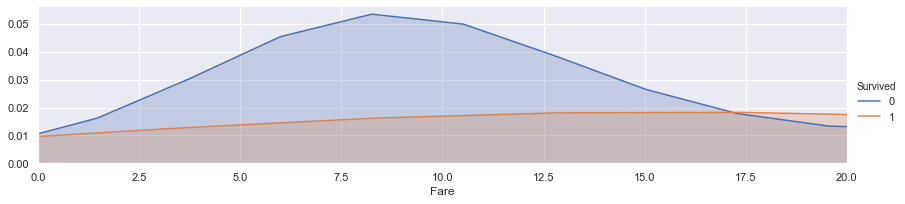

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

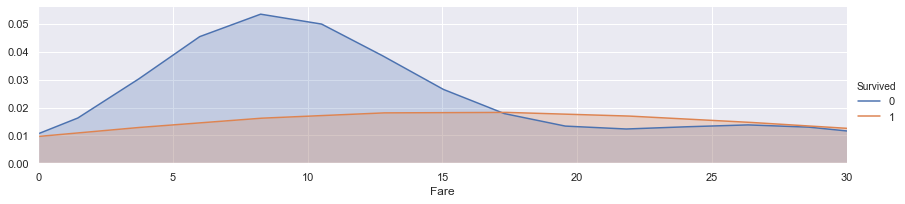

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

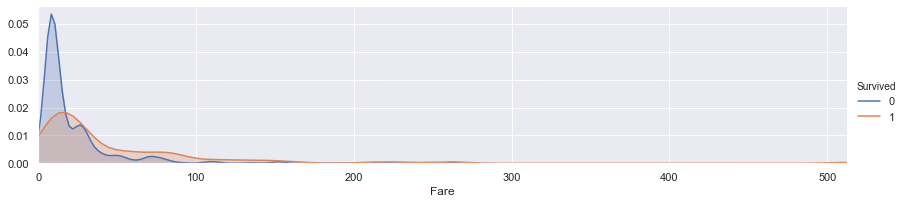

In [49]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [50]:

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,C
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S
3,4,1,1,1,2.0,1,0,113803,2.0,C123,S
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S


In [52]:
#cabin

In [53]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
C47            1
C95            1
B3             1
C70            1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [54]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

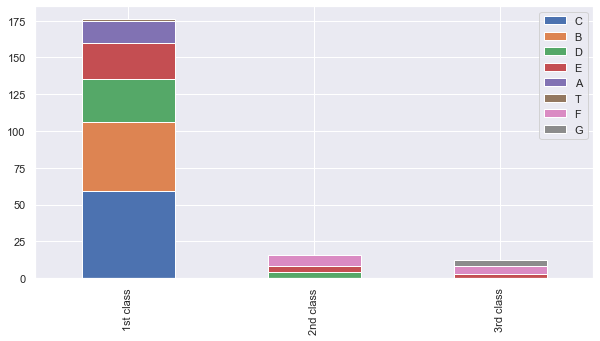

In [55]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [56]:

cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [57]:

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [58]:
#family size

In [59]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

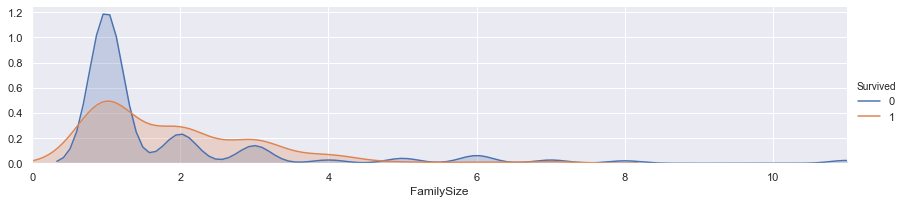

In [60]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [61]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,S,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,C,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,S,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,S,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,S,0.0


In [63]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [64]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0


In [66]:
#MODELLING

In [67]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [68]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
#Building ML MODEL

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9077181208053692
Test accuracy 0.7898305084745763


In [74]:
#testing

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [77]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.76404494 0.83146067 0.83146067 0.78651685
 0.83146067 0.79775281 0.78651685 0.82022472]


In [79]:
#decision tree

In [80]:

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.79775281 0.79775281 0.88764045 0.7752809
 0.83146067 0.78651685 0.76404494 0.83146067]


In [81]:
round(np.mean(score)*100, 2)

81.14

In [82]:
#Random forest

In [84]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,X,y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.82022472 0.82022472 0.7752809  0.88764045 0.80898876
 0.82022472 0.78651685 0.76404494 0.85393258]


In [85]:
round(np.mean(score)*100, 2)

81.37

In [86]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.79775281 0.79775281 0.78651685 0.83146067 0.79775281
 0.78651685 0.85393258 0.83146067 0.83146067]


In [87]:
round(np.mean(score)*100,2)

81.26

In [88]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [89]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64